<a href="https://colab.research.google.com/github/AyushChauhan-ui/CropCounsel/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('crops1.csv')

In [ ]:
df.head()

,N,P,K,temperature(in degree celsius),humidity(in percentage),ph of soil,rainfall( in mm ),label,water-availability(liters per year)
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3000.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3020.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3040.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3060.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3080.0


In [ ]:
df.describe()

,N,P,K,temperature(in degree celsius),humidity(in percentage),ph of soil,rainfall( in mm ),water-availability(liters per year)
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000
mean,63.829806,60.604683,55.864475,25.639519,71.163856,6.488970,164.170015,5847.690737
std,80.931997,45.239587,60.152045,5.352845,22.182367,0.864728,209.081882,22412.871398
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000310
25%,21.000000,27.000000,20.000000,22.301574,59.270550,5.934136,64.776515,0.002327
50%,37.000000,55.000000,31.000000,25.669011,80.046782,6.419052,95.713885,1.068850
75%,84.000000,73.000000,52.000000,28.918620,89.895933,6.960358,133.191442,47.900000
max,496.000000,250.000000,250.000000,43.675493,99.981876,9.935091,898.721657,114462.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   N                                    2221 non-null   int64  
 1   P                                    2221 non-null   int64  
 2   K                                    2221 non-null   int64  
 3   temperature(in degree celsius)       2221 non-null   float64
 4   humidity(in percentage)              2221 non-null   float64
 5   ph of soil                           2221 non-null   float64
 6   rainfall( in mm )                    2221 non-null   float64
 7   label                                2221 non-null   object 
 8   water-availability(liters per year)  2221 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 156.3+ KB


In [ ]:
df.shape

(2221, 9)

In [ ]:
df.isna().sum()

N                                      0
P                                      0
K                                      0
temperature(in degree celsius)         0
humidity(in percentage)                0
ph of soil                             0
rainfall( in mm )                      0
label                                  0
water-availability(liters per year)    0
dtype: int64

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature(in degree celsius)',
       'humidity(in percentage)', 'ph of soil', 'rainfall( in mm )', 'label',
       'water-availability(liters per year)'],
      dtype='object')

In [ ]:
df.columns = ['N','P','K','Temperature','Humidity','pH','Rainfall', 'Label', 'Water Availability']

In [ ]:
df.head()

,N,P,K,Temperature,Humidity,pH,Rainfall,Label,Water Availability
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3000.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3020.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3040.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3060.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3080.0


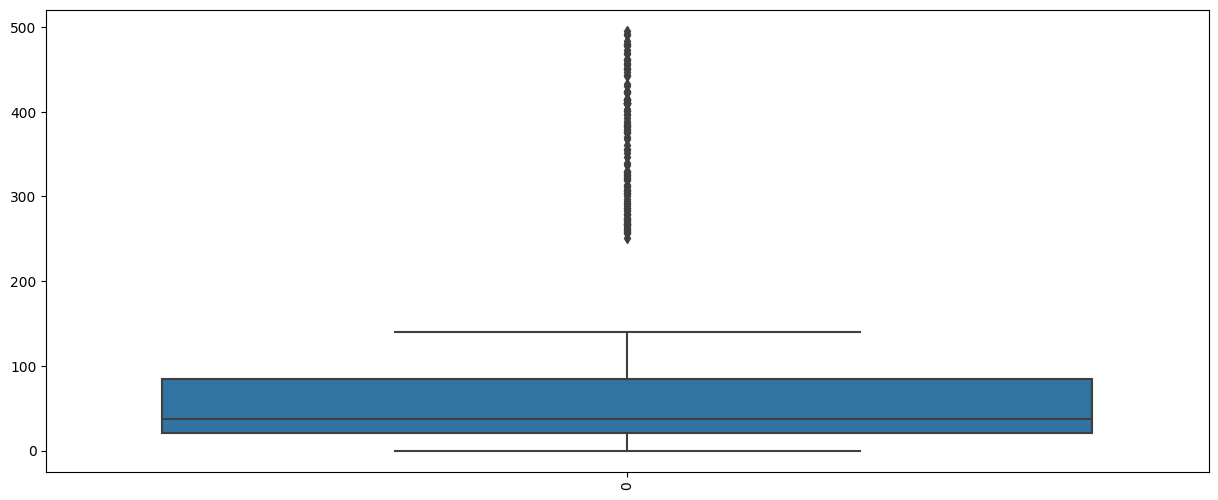

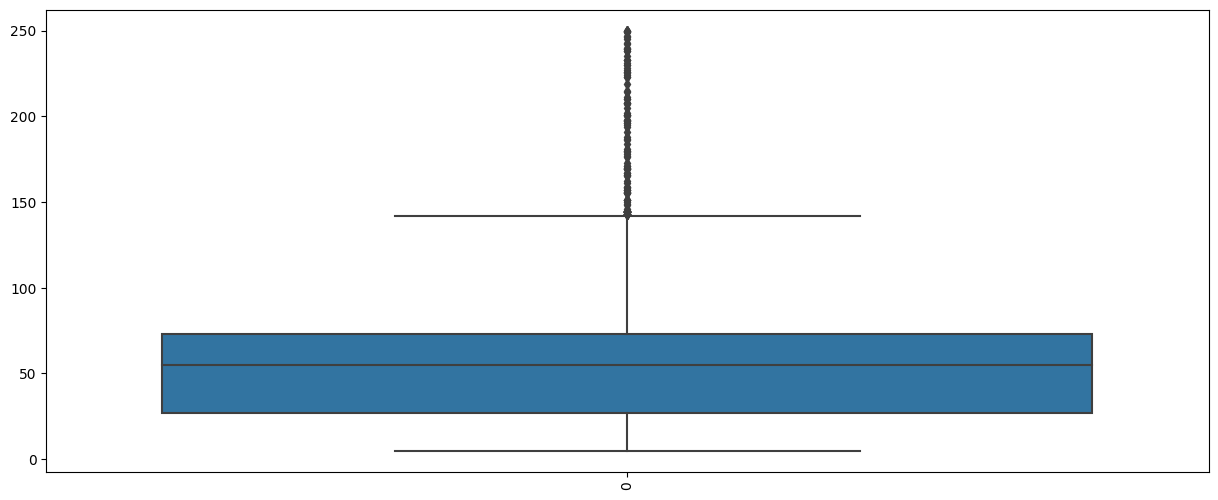

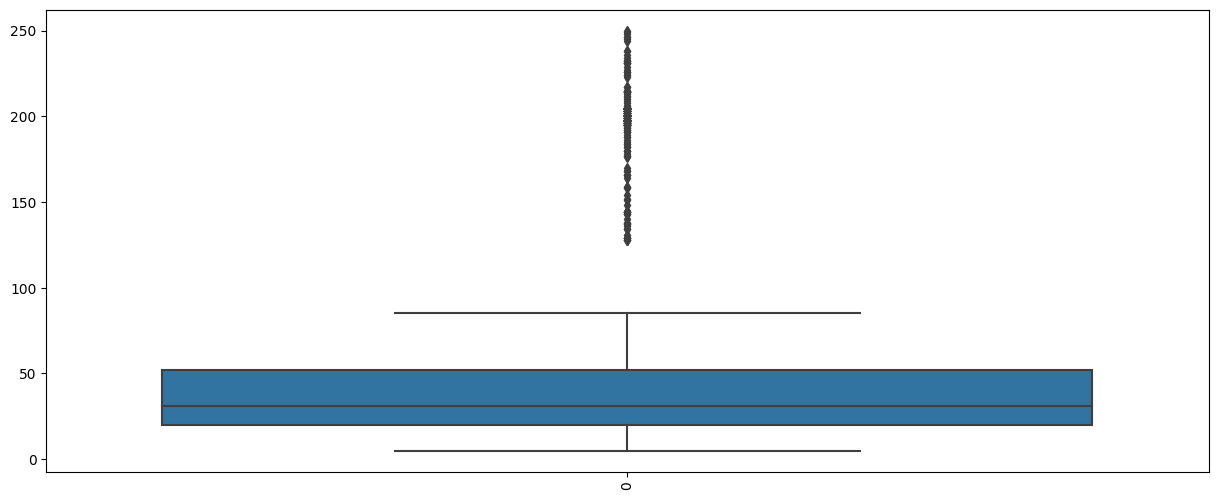

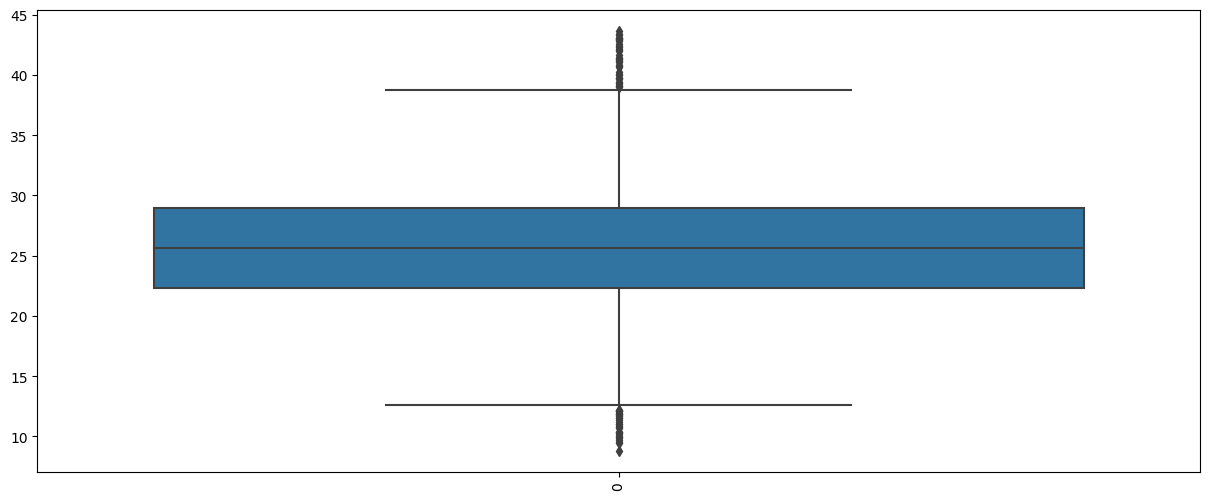

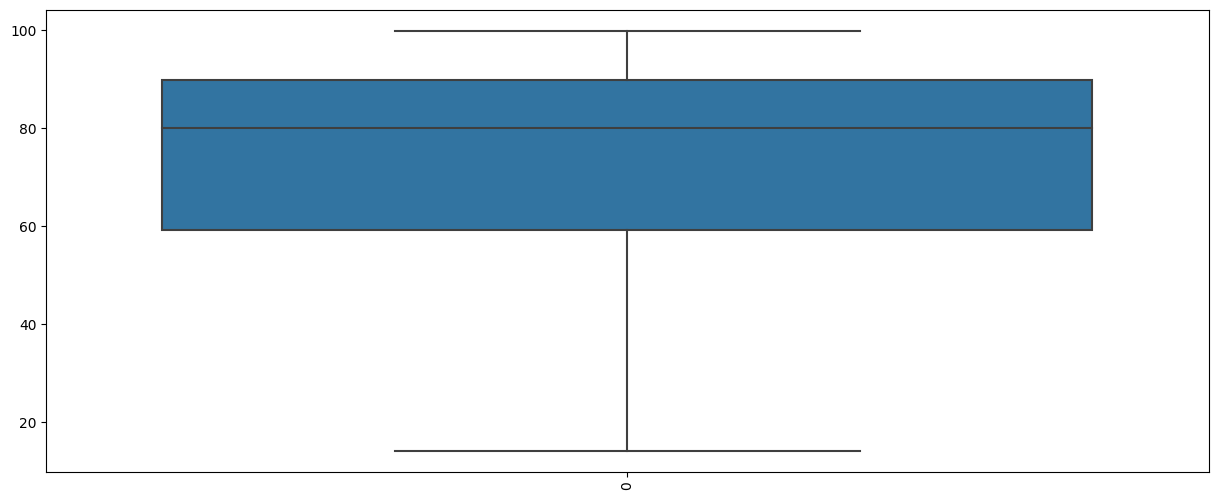

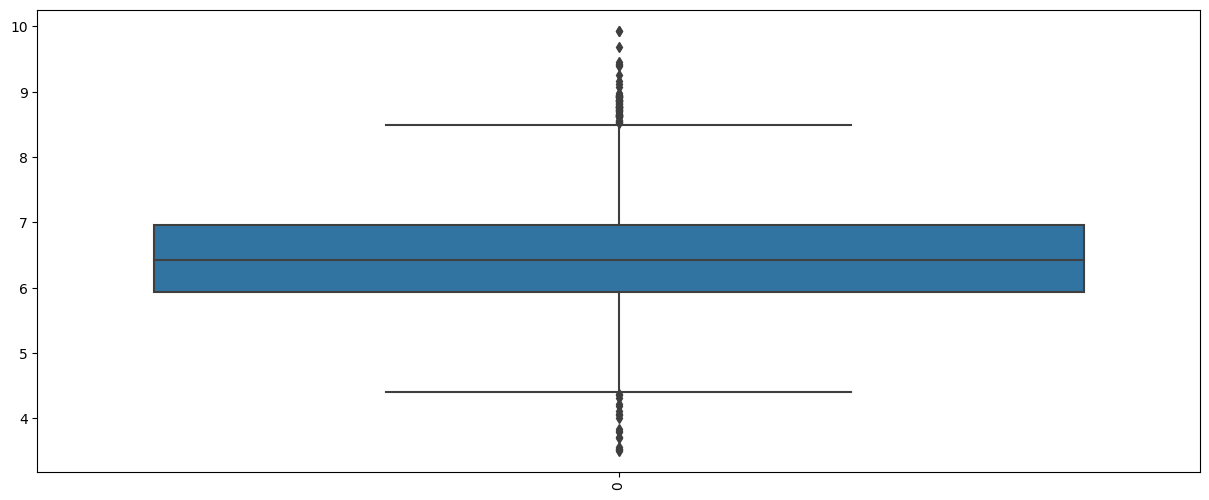

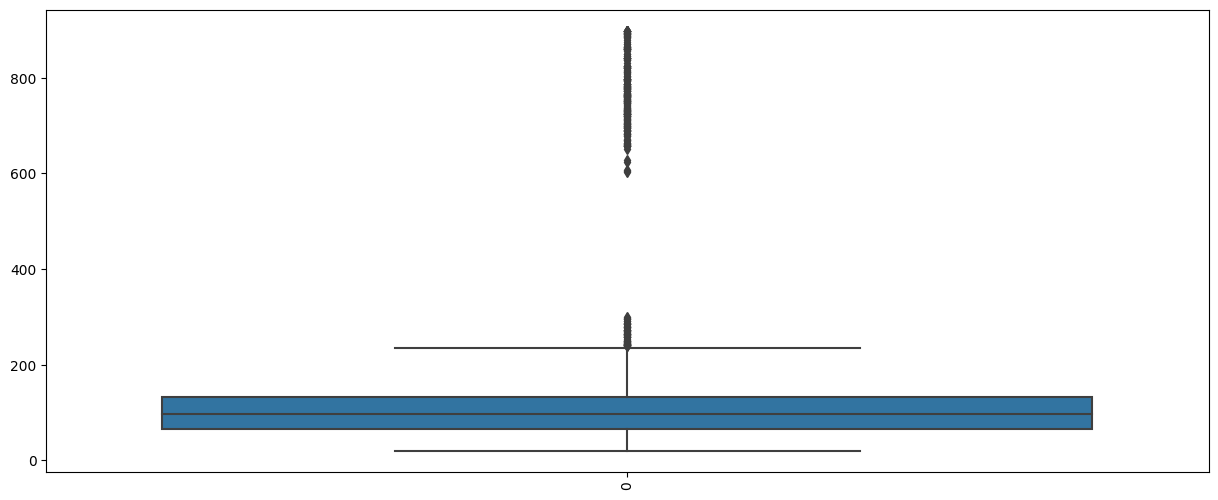

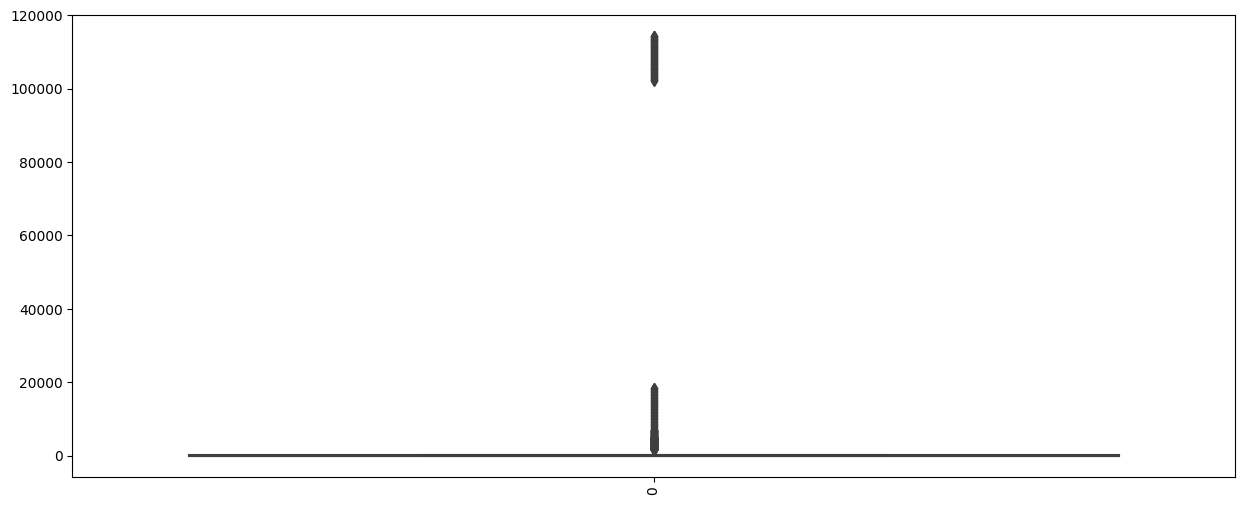

In [ ]:
features = df[['N','P','K','Temperature','Humidity','pH','Rainfall','Water Availability']]
for i in features.columns:
             plt.figure(figsize=(15,6))
             sns.boxplot(features[i])
             plt.xticks(rotation = 90)
             plt.show()

In [ ]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - outlier")
            elif lower_limit < x.min():
                print("Lower limit passed - No outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - outlier")
for i in df['Label'].unique():
    detect_outlier(df['K'][df['Label']==i])
    print(' ')


Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 8.875 

In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N,P,K,Temperature,Humidity,pH,Rainfall,Water Availability
N,1.000000,0.518281,0.420073,-0.040708,0.137837,0.245458,0.557683,0.169740
P,0.518281,1.000000,0.796330,-0.128518,-0.044529,0.091545,0.314149,-0.085884
K,0.420073,0.796330,1.000000,-0.162139,0.192895,0.013822,0.267683,-0.128014
Temperature,-0.040708,-0.128518,-0.162139,1.000000,0.183481,-0.009761,-0.008499,-0.056894
Humidity,0.137837,-0.044529,0.192895,0.183481,1.000000,0.010551,-0.057163,0.119791
pH,0.245458,0.091545,0.013822,-0.009761,0.010551,1.000000,0.108770,0.103731
Rainfall,0.557683,0.314149,0.267683,-0.008499,-0.057163,0.108770,1.000000,-0.084159
Water Availability,0.169740,-0.085884,-0.128014,-0.056894,0.119791,0.103731,-0.084159,1.000000


<ipython-input-14-90160fa7e277>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

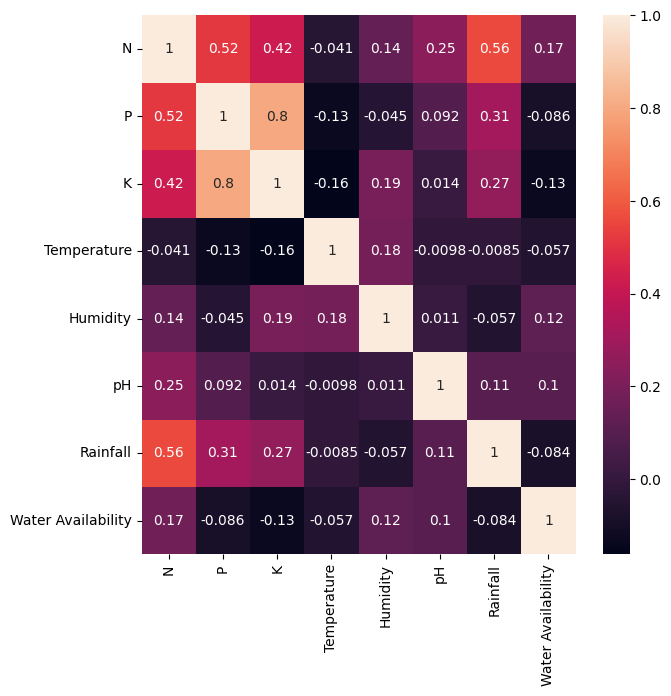

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])


In [ ]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 0,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {'n_estimators': [50, 75,100, 150, 200,300],}
classifier=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
accuracy_score(y_pred, y_test)

1.0

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

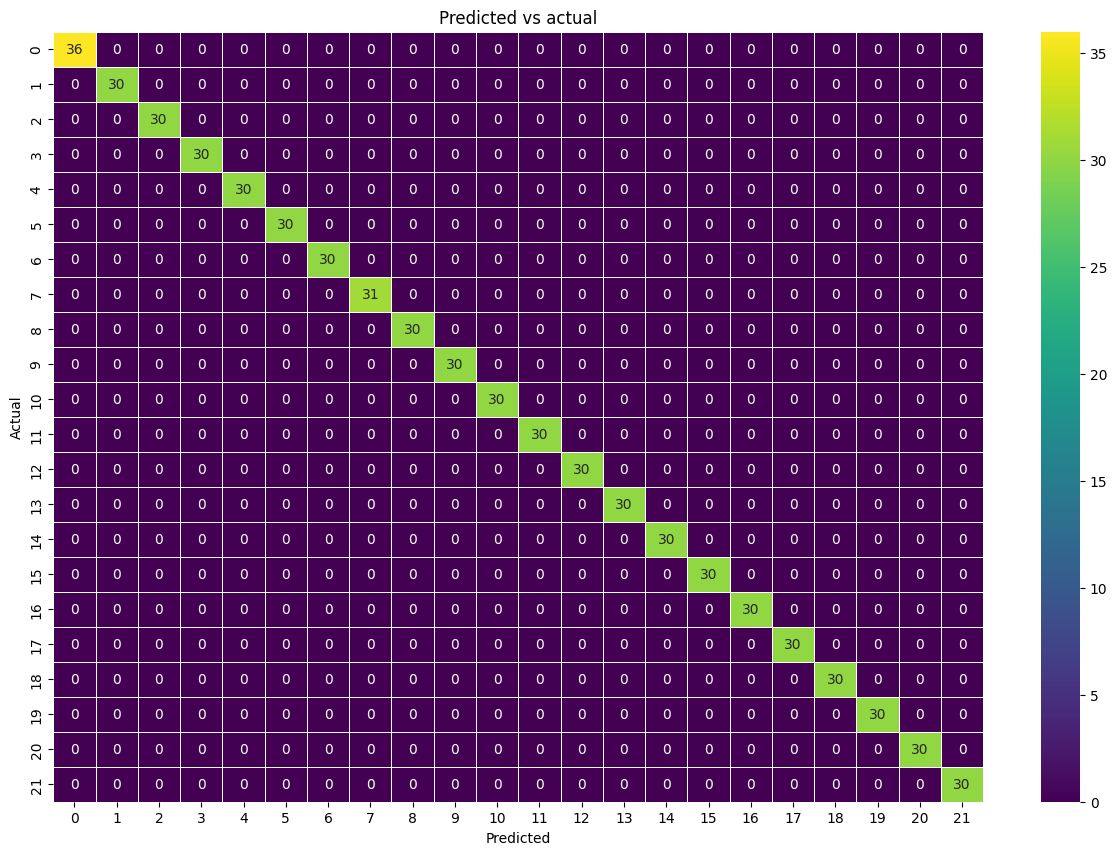

In [ ]:
y_pred = classifier.predict(X_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred=lgbm.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9970014992503748

In [ ]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
xg= xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
        seed=0, subsample=1)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None, colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              nthread=-1, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred=xg.predict(X_test)


In [ ]:
accuracy_score(y_pred, y_test)

0.9940029985007496

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print(best_hyperparams)

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
sv=RandomizedSearchCV(SVC(),param_grid,cv=5)
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
accuracy_score(y_pred, y_test)

0.9970014992503748

In [ ]:
confusion_matrix(y_test, y_pred)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

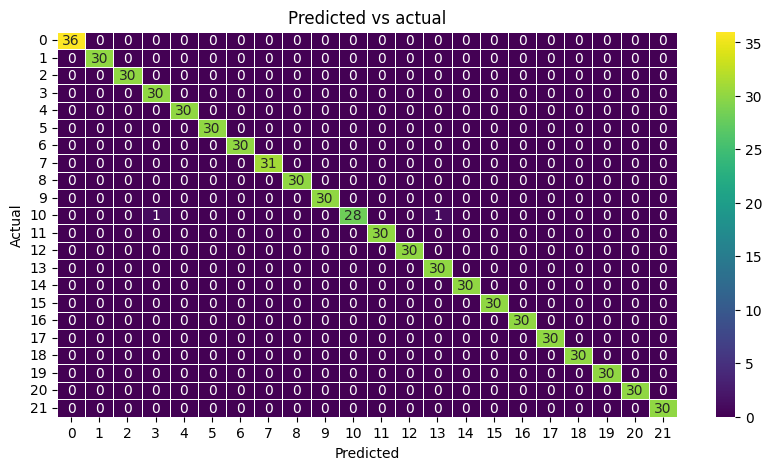

In [ ]:
y_pred = sv.predict(X_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
accuracy_score(y_pred, y_test)


In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))